# PREDICTION OF HEART DISEASE

In this Machine Learning model, dataset has been collected from kagle (https://www.kaggle.com/ronitf/heart-disease-uci) and Machine Learning is used to make predictions on whether a person is suffering from Heart Disease or not.

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Machine Learning Libraries

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

## Importing Dataset

With the required libraries loaded, now we'll import the data from the file dataset.csv with the help of pandas read_csv method.

In [3]:
dataset = pd.read_csv('/Users/shashikantbinhan/Documents/IIM Shillong/X-Classes/TERM 4/DAP/ML Project /Building a ML model for predicting Heart Disease/dataset.csv')

In [4]:
print("Rows :",dataset.shape[0])
print("\nColumns :",dataset.shape[1])
print("\nFeatures :",dataset.columns.tolist())

Rows : 303

Columns : 14

Features : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Now let's look at the variables upclose

#### Age

In [9]:
dataset.age.mean()

54.366336633663366

/Users/shashikantbinhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


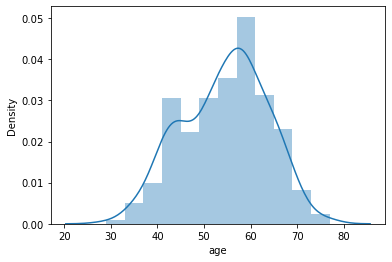

In [10]:
plt.tight_layout()
sns.distplot(dataset['age'])
plt.show()

We can see that the data is bell shaped with the mean age around 54.

#### Sex

In [11]:
dataset.sex.value_counts()
# 1=Male, 0=Female

1    207
0     96
Name: sex, dtype: int64

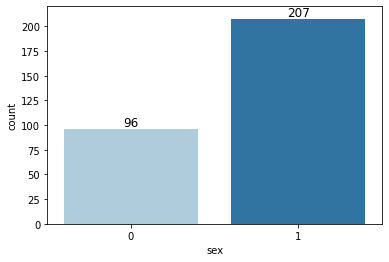

In [12]:
sns.countplot(x='sex', data=dataset, palette='Paired')

ax = plt.gca()

y_max = dataset['sex'].value_counts().max() 
ax.set_ylim([0, 220])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()


#### Chest Pain

In [13]:
print(dataset['cp'].nunique())
print('\n',dataset['cp'].value_counts().sort_index(ascending=True).to_frame())

4

     cp
0  143
1   50
2   87
3   23


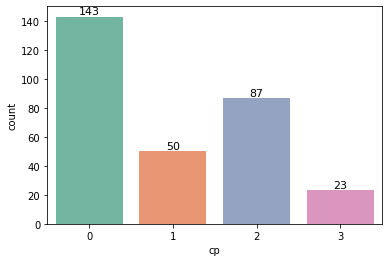

In [14]:
sns.countplot(x='cp', data=dataset, palette='Set2')

ax = plt.gca()

y_max = dataset['cp'].value_counts().max() 
ax.set_ylim([0, 150])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom')
plt.show()

#### Fasting Blood Sugar

In [15]:
print(dataset['fbs'].nunique())
print('\n', dataset['fbs'].value_counts().to_frame())

2

    fbs
0  258
1   45


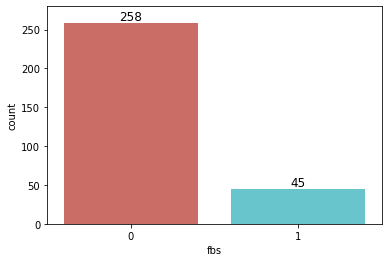

In [16]:
sns.countplot(x='fbs', data=dataset, palette="hls")

ax = plt.gca()

y_max = dataset['fbs'].value_counts().max() 
ax.set_ylim([0, 280])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

#### Restecg

In [17]:
print(dataset['restecg'].nunique())
print('\n', dataset['restecg'].value_counts().sort_index(ascending=True).to_frame())

3

    restecg
0      147
1      152
2        4


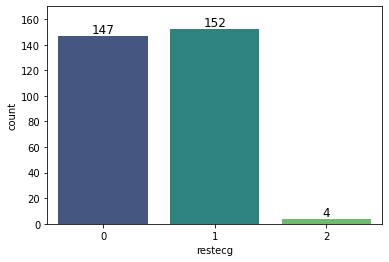

In [18]:
sns.countplot(x='restecg', data=dataset, palette='viridis')

ax = plt.gca()

y_max = dataset['restecg'].value_counts().max() 
ax.set_ylim([0, 170])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

#### Exang (Exercise induced Angina)

In [19]:
print(dataset['exang'].nunique())
print('\n', dataset['exang'].value_counts().to_frame())

2

    exang
0    204
1     99


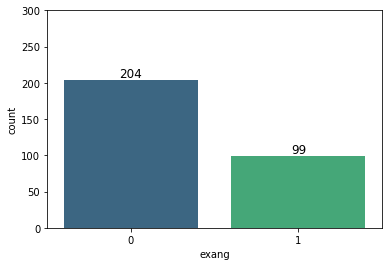

In [20]:
sns.countplot(x='exang', data=dataset, palette='viridis')

ax = plt.gca()

y_max = dataset['exang'].value_counts().max() 
ax.set_ylim([0, 300])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

#### Slope

In [21]:
print(dataset['slope'].nunique())
print('\n', dataset['slope'].value_counts().sort_index(ascending=True).to_frame())

3

    slope
0     21
1    140
2    142


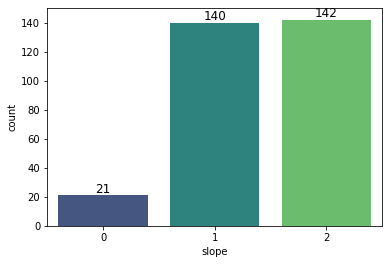

In [22]:
sns.countplot(x='slope', data=dataset, palette='viridis')

ax = plt.gca()

y_max = dataset['slope'].value_counts().max() 
ax.set_ylim([0, 150])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

#### ca (The number of major blood vessels(0-3) supplying blood to heart blocked)

In [23]:
print(dataset['ca'].nunique())
print('\n', dataset['ca'].value_counts().to_frame())

5

     ca
0  175
1   65
2   38
3   20
4    5


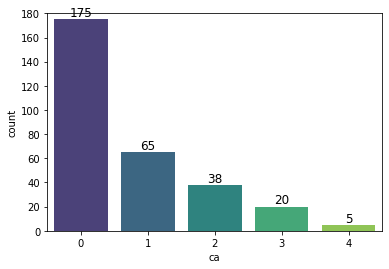

In [24]:
sns.countplot(x='ca', data=dataset, palette='viridis')

ax = plt.gca()

y_max = dataset['ca'].value_counts().max() 
ax.set_ylim([0, 180])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

#### thal (thalium heart scan)

In [25]:
print(dataset['thal'].nunique())
print('\n', dataset['thal'].value_counts().sort_index(ascending=True).to_frame())

4

    thal
0     2
1    18
2   166
3   117


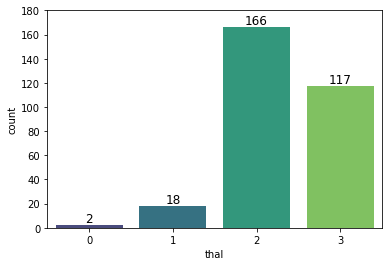

In [26]:
sns.countplot(x='thal', data=dataset, palette='viridis')

ax = plt.gca()

y_max = dataset['thal'].value_counts().max() 
ax.set_ylim([0, 180])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

#### target

In [27]:
print(dataset['target'].nunique())
print('\n', dataset['target'].value_counts().to_frame())

2

    target
1     165
0     138


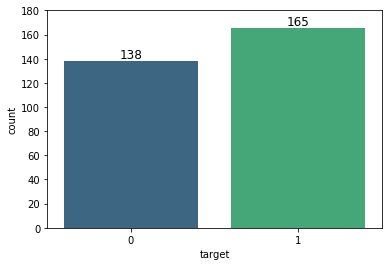

In [28]:
sns.countplot(x='target', data=dataset, palette='viridis')

ax = plt.gca()

y_max = dataset['target'].value_counts().max() 
ax.set_ylim([0, 180])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

Let's look at the frequency of Heart disease in males and females.

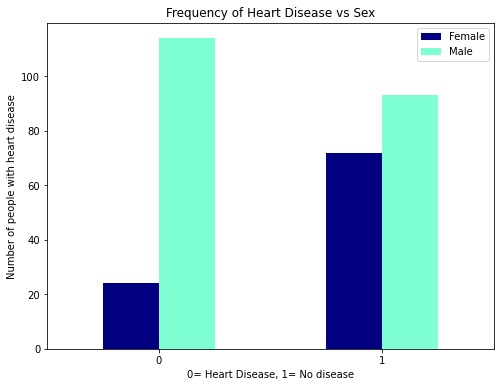

In [29]:
pd.crosstab(dataset.target,dataset.sex).plot(kind='bar',figsize=(8,6),color=["navy","aquamarine"])
plt.title("Frequency of Heart Disease vs Sex")
plt.xlabel("0= Heart Disease, 1= No disease")
plt.ylabel("Number of people with heart disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

We can see that the frequency of heart disease in the respective genders is
Females: 23 ,
Males: 120

& the frequency of no heart disease in respective genders is 
Females: 73 ,
Males: 87 .

<AxesSubplot:xlabel='age', ylabel='chol'>

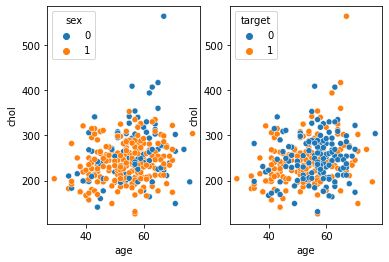

In [30]:
plt.subplot(1,2,1)
sns.scatterplot(x='age',y='chol',hue='sex',data=dataset)
plt.subplot(1,2,2)
sns.scatterplot(x='age',y='chol',hue='target',data=dataset)

While plotting the graph with x=age and y=chol, we find that most of the people lie between the age group of 40-60 with cholestrol levels between 150-350.

#### Now lets see which gender and age group are prone to having heart attacks 

In [31]:
dataset_Gender_Age = dataset.groupby(['sex','age'])['target'].count().reset_index().sort_values(by='target',ascending=False)
dataset_Gender_Age.head(10).style.background_gradient(cmap='inferno')

,sex,age,target
59,1,58,13
58,1,57,13
60,1,59,13
53,1,52,12
55,1,54,11
45,1,44,9
52,1,51,8
57,1,56,8
61,1,60,7
65,1,64,7


We can see that mostly men are prone to be having heart attacks with highest frequency in the age group of 58 to 60

#### Now lets see which gender is prone to heart attack when it comes to chest pain

In [32]:
dataset_pain_gender = dataset.groupby(['sex','cp'])['target'].count().reset_index().sort_values(by='target',ascending=False)
dataset_pain_gender.head(10).style.background_gradient(cmap='gist_heat')

,sex,cp,target
4,1,0,104
6,1,2,52
0,0,0,39
2,0,2,35
5,1,1,32
7,1,3,19
1,0,1,18
3,0,3,4


People with no symptom of chest pain are prone to heart attack the most followed by the people with cp value 2.

#### Number of people has Heart-attack according Fasting_blood_sugar and Gender

In [33]:
dataset_Sex_fbs = dataset.groupby(['sex','fbs'])['target'].count().reset_index().sort_values(by='target',ascending=False)
dataset_Sex_fbs.head(5).style.background_gradient(cmap='plasma')

,sex,fbs,target
2,1,0,174
0,0,0,84
3,1,1,33
1,0,1,12


It is observed that men with fasting blood sugar value of 0 are most prone to heart attack, while females with fbs value 0 comes second.

### Now lets look at the correlation between these 13 features

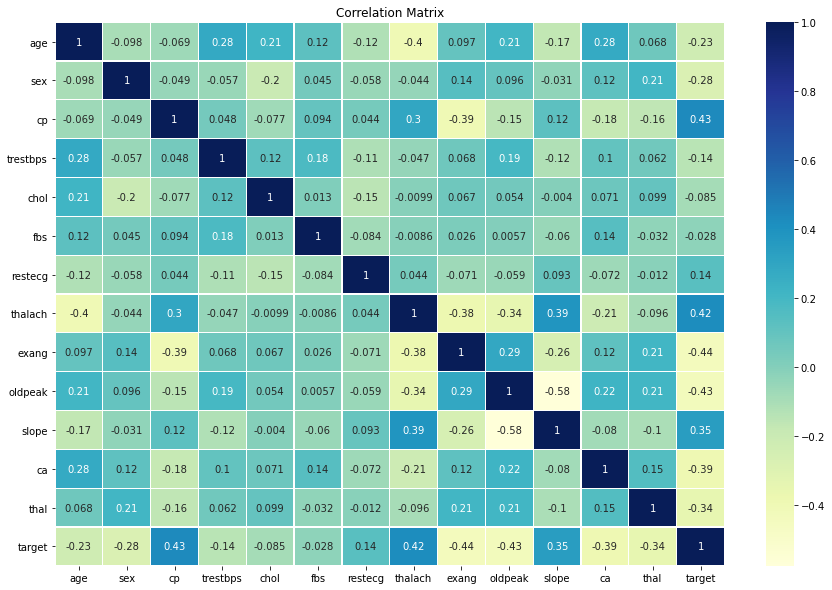

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap="YlGnBu", annot=True, linewidth=0.2)
plt.title("Correlation Matrix")
plt.show()

#### Let's look at the correlation with the target value

In [35]:
dataset.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

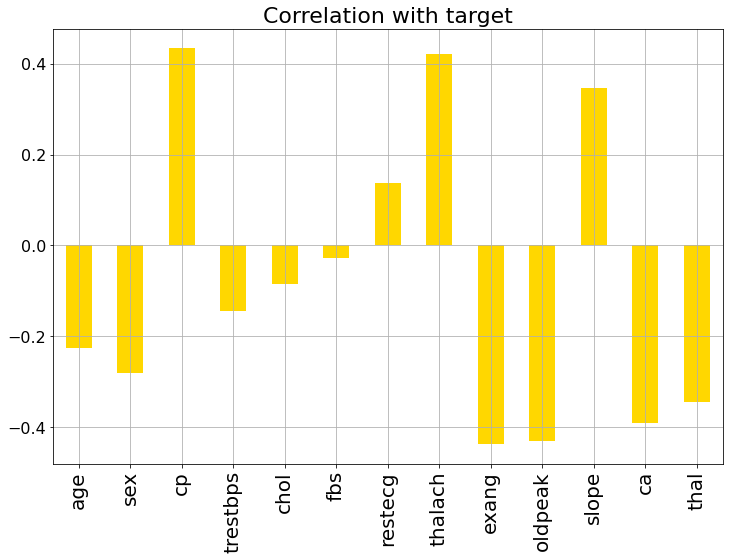

In [36]:
a = dataset.drop('target', axis=1)
a.corrwith(dataset.target).plot(kind='bar', grid=True, figsize=(12, 8), color=['gold'])
plt.title("Correlation with target", size=22)
plt.xticks(size=20)
plt.yticks(size=16)
plt.show()

Cholestrol and Fasting blood sugar are least related with the target value where as Chest pain and Maximum heart rate have significant correlation.

### Outliers in the data

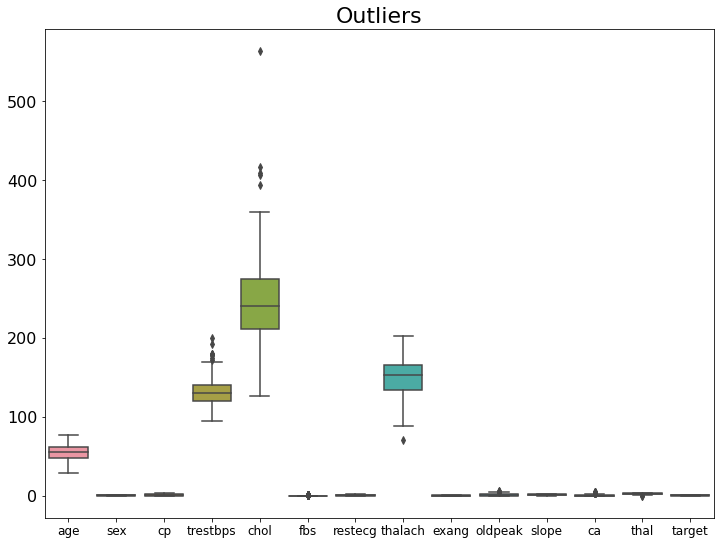

In [37]:
plt.figure(figsize=(12,9))
sns.boxplot(data=dataset)

plt.title("Outliers",size=22)

plt.xticks(fontsize=12)
plt.yticks(fontsize=16)

plt.show()

In [38]:
target = dataset['target']
detail = dataset.drop('target',axis=1)

In [39]:
detail.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Machine Learning

Now we will split the data into training and testing datasets. After that, we'll apply the Machine learning models.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(detail, target, test_size=0.3)

### 1. Logistic Regression

In [41]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
Prediction1=LR.predict(X_test)

/Users/shashikantbinhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
np.array(y_test)

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0])

In [43]:
Prediction1

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0])

In [44]:
print(classification_report(y_test,Prediction1))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.87      0.90      0.89        52

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.86        91
weighted avg       0.87      0.87      0.87        91



In [45]:
print(confusion_matrix(y_test,Prediction1))

[[32  7]
 [ 5 47]]


### 2. Random Forest 

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
Prediction2=RFC.predict(X_test)

In [48]:
np.array(y_test)

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0])

In [49]:
Prediction2

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0])

In [50]:
print(classification_report(y_test,Prediction2))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        39
           1       0.89      0.90      0.90        52

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [51]:
print(confusion_matrix(y_test,Prediction2))

[[33  6]
 [ 5 47]]


### 3. K Nearest Neighbours

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
Prediction3=KNN.predict(X_test)

In [54]:
np.array(y_test)

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0])

In [55]:
Prediction3

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0])

In [56]:
print(classification_report(y_test,Prediction3))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68        39
           1       0.76      0.75      0.76        52

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91



In [57]:
print(confusion_matrix(y_test,Prediction3))

[[27 12]
 [13 39]]


### 4. Support Vector Classifier

In [58]:
from sklearn.svm import SVC

In [59]:
SV=SVC()
SV.fit(X_train,y_train)
Prediction4=SV.predict(X_test)

In [60]:
np.array(y_test)

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0])

In [61]:
Prediction4

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [62]:
print(classification_report(y_test,Prediction4))

              precision    recall  f1-score   support

           0       0.81      0.54      0.65        39
           1       0.72      0.90      0.80        52

    accuracy                           0.75        91
   macro avg       0.77      0.72      0.72        91
weighted avg       0.76      0.75      0.74        91



In [63]:
print(confusion_matrix(y_test,Prediction4))

[[21 18]
 [ 5 47]]


# Conclusion

The objective of this project was to build a machine learning model to make predictions on whether a person is suffering from heart disease or not. After importing the data, we analysed it using plots. We generated dummy variables for categorical features and scaled other features and then applied the Machine Learning Algorithms. By varying parameters across models we obtained the following inferences:

| Algorithm                 | Accuracy | F1 Score |
| ------------------------- | -------- | -------- |
| Logistic Regression       |   84.0%  |   0.88   |  
| Random Forest             |   84.0%  |   0.85   |
| K Nearest Neighbors       |   56.0%  |   0.56   |
| Support Vector Classifier |   83.0%  |   0.83   |

Logistic regression and Random Forest classifier have the highest accuracy of 84%, followed by Support Vector Classifier and we should go for these tests over KNN.

# DASHBOARD

In [64]:
# Enter filters 

Filter for Gender (Enter M=Male, F=Female and B for both): M
Filter for High/Low Blood Sugar Patients (Enter H=High, L=Low and B for both): H


[Text(0.5, 70.0, 'Number of Vessles colored by flurosopy'),
 Text(700.8235294117648, 0.5, '# Patients'),
 Text(0.5, 1.0, 'Distribution of Patients wrt to #Vessels colored by flurosopy')]

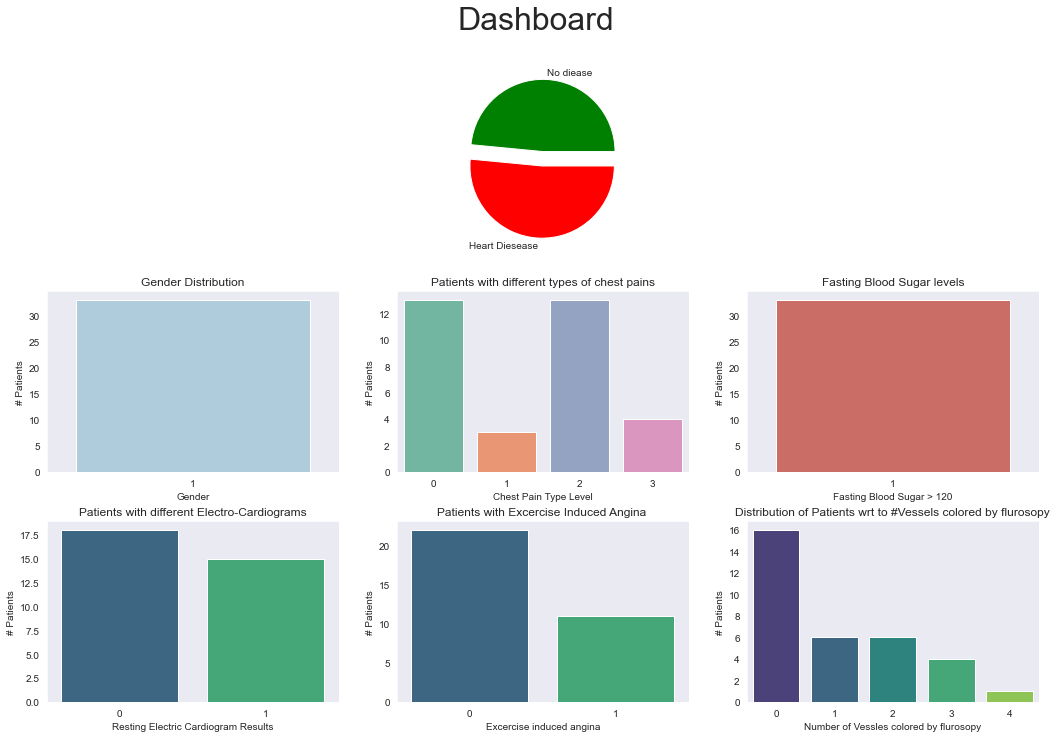

In [65]:
gender_filter = input("Filter for Gender (Enter M=Male, F=Female and B for both): ")
if gender_filter.upper() == 'M':
    dataset1 = dataset[dataset.sex ==1]
elif gender_filter.upper() == 'F':
    dataset1 = dataset[dataset.sex ==0]
elif gender_filter.upper() == 'B':
    dataset1 = dataset
else:
    print("Wrong choice")

fasting_filter = input("Filter for High/Low Blood Sugar Patients (Enter H=High, L=Low and B for both): ")
if fasting_filter.upper() == 'H':
    dataset1 = dataset1[dataset1.fbs ==1]
elif fasting_filter.upper() == 'L':
    dataset1 = dataset1[dataset1.fbs ==0]
elif fasting_filter.upper() == 'B':
    dataset1 = dataset1
else:
    print("Wrong choice")
    
sns.set_style('dark')

fig1, ax = plt.subplots(3,3, figsize = (15,10))
fig1.tight_layout(pad=3)

ax[0,0].axis('off')
ax[0,2].axis('off')

fig1.suptitle("Dashboard", fontsize = 32, y = 1.03)
    
ax[0,1].pie(dataset1.groupby(target).target.count(), colors = ['g','r'], labels = ['No diease','Heart Diesease'], explode = [0,0.2] )

sns.countplot(x='sex', data=dataset1, palette='Paired', ax = ax[1,0])
ax[1,0].set(xlabel ='Gender', ylabel = '# Patients', title = 'Gender Distribution' )

sns.countplot(x='cp', data=dataset1, palette='Set2', ax = ax[1,1])
ax[1,1].set(xlabel ='Chest Pain Type Level', ylabel = '# Patients', title = 'Patients with different types of chest pains' )

sns.countplot(x='fbs', data=dataset1, palette="hls", ax=ax[1,2])
ax[1,2].set(xlabel ='Fasting Blood Sugar > 120', ylabel = '# Patients', title = 'Fasting Blood Sugar levels')

sns.countplot(x='restecg', data=dataset1, palette='viridis', ax = ax[2,0])
ax[2,0].set(xlabel ='Resting Electric Cardiogram Results', ylabel = '# Patients', title = 'Patients with different Electro-Cardiograms')

sns.countplot(x='exang', data=dataset1, palette='viridis', ax = ax[2,1])
ax[2,1].set(xlabel ='Excercise induced angina', ylabel = '# Patients', title = 'Patients with Excercise Induced Angina ')

sns.countplot(x='ca', data=dataset1, palette='viridis',ax=ax[2,2])
ax[2,2].set(xlabel ='Number of Vessles colored by flurosopy', ylabel = '# Patients', title = 'Distribution of Patients wrt to #Vessels colored by flurosopy')